Abandonamos la variabel dependiente y **Y** desaparece

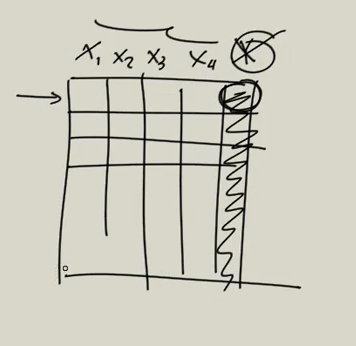

In [1]:
from IPython.display import Image
Image(filename='img/1.PNG')

Son patrones que no tienen variabel de salida

ChatGT ----Es un red transformer con bases de datos enormes que aborda problemas no supervisados. 

Es capaz de generar contenido a partir de una entrada que se le de, sin que haya una etiqueta detras que claisifique lso patrones.



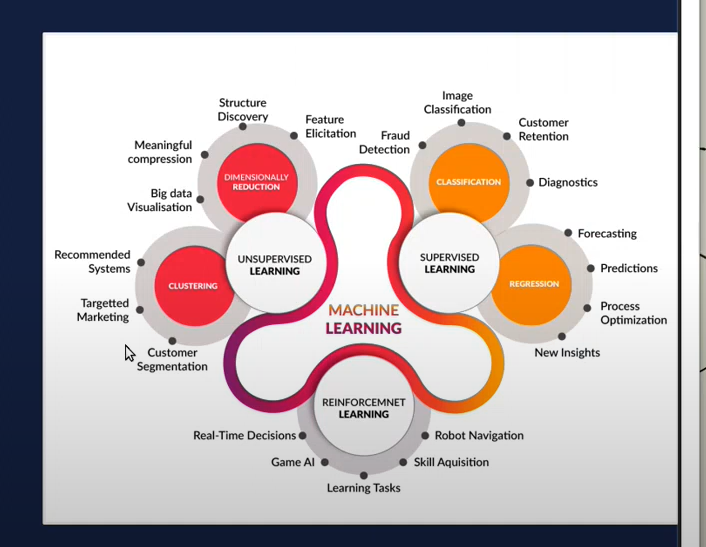

In [2]:
from IPython.display import Image
Image(filename='img/2.PNG')

La parte de clustering es muy interesante en la parte de marketing. Puedo segmentar un poblacion de clientes y decidir a quienees les aplico una oferta y a quienes no.

Eso es lo que vamos a ver.

Como agrupar patrones para que sean esso grupos lo mas parecido posibles. Lo haremos analizando la estructura de los datos y que sea comun entre los distintos patrones.

esto es **CLUSTERING**

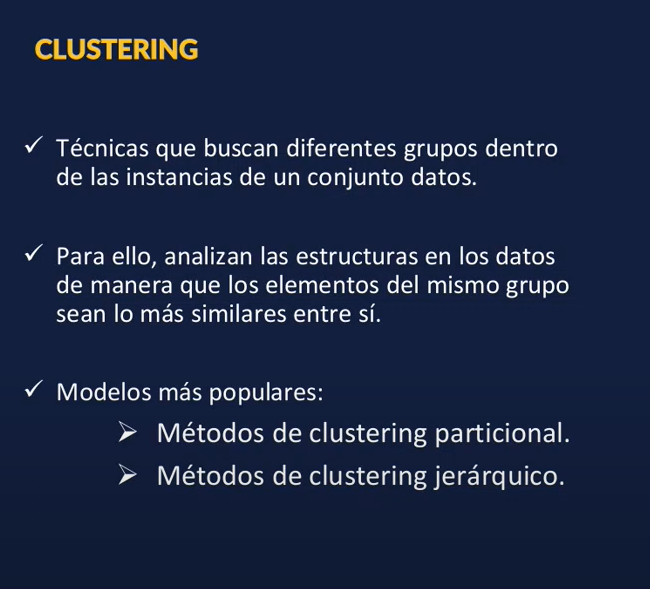

In [3]:
from IPython.display import Image
Image(filename='img/3.PNG')

EL **centroide** es el centro imaginar donde ese centra

Los patrones se asignan al cnetroide mas cercano

De esta manera podemos calcular el centroide en todos los planos.


Digamos que asigno aleatoriamente 3 centroides.

Y despues asigno los patrones al centroide mas cercano.

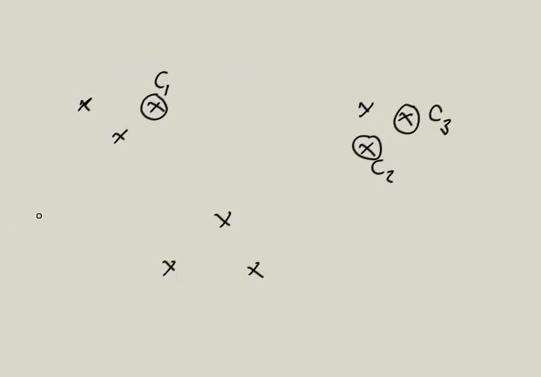

In [4]:
from IPython.display import Image
Image(filename='img/5.PNG')

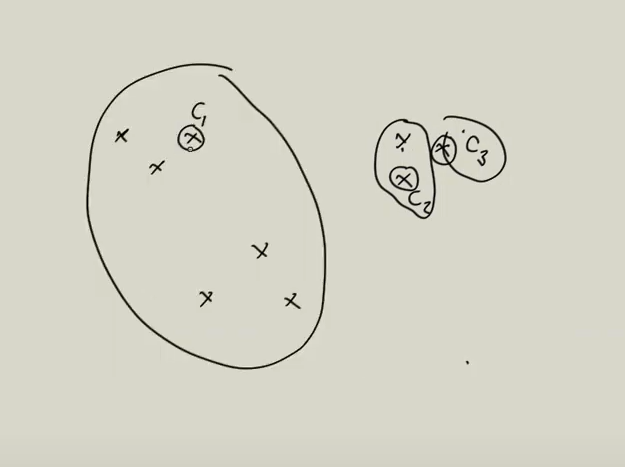

In [5]:
from IPython.display import Image
Image(filename='img/6.PNG')

Despues se recalcula el centroide otra vez y se reasignan los patrones al centroide mas cercano

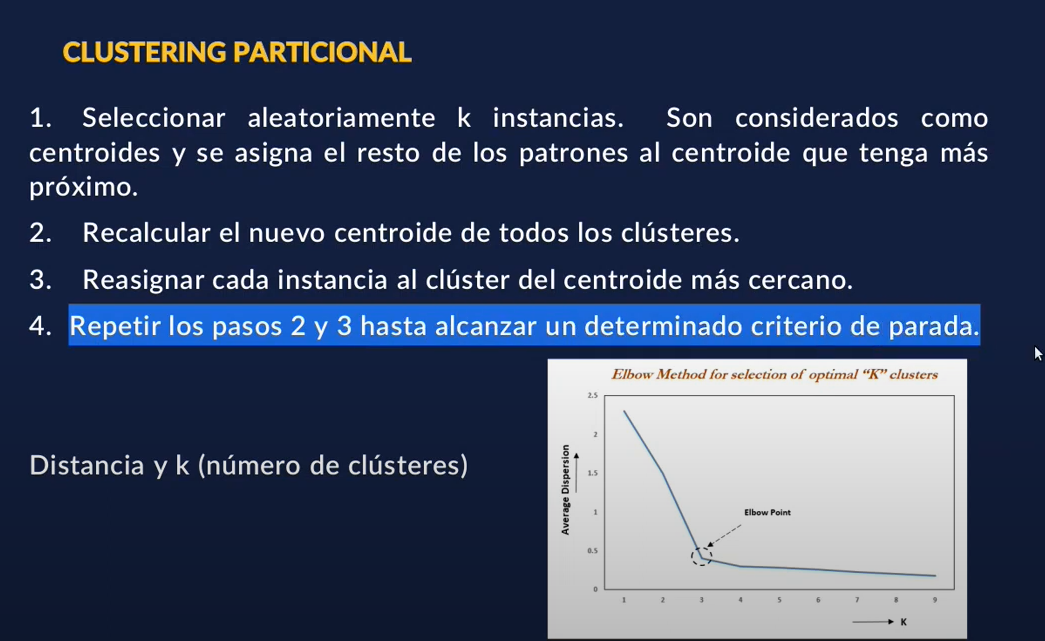

In [6]:
from IPython.display import Image
Image(filename='img/7.PNG')

Aqui es importante decidir el termino de similitud (distancia), y como se define el criterio de parada.

Para ello es importante hablar con el cliente que lo está pidiendo.


Voy a implementar un K-Medias para lograr conseguir el codo (ELbow point) de **K** optimo

K-means es una técnica de Machine Learning no supervisado que por la sencillez y el rendimiento que presenta la hacen ser un modelo apropiado para resolver problemas de clustering.

El numero de clusters es uno de los puntos más jodidos de este tiupo de algoritmos


In [7]:
#------------------------------------------------------------------------
# Esta es una tecnica basada en distancia y necessita reescalado de datos.
#------------------------------------------------------------------------
from sklearn.cluster import KMeans 


from pandas import read_csv 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler  


In [8]:
filename = 'Seed_Data.csv'  

data = read_csv(filename)  
data.dropna(inplace=True) 

data.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


Aqui no existe variable de salida entonces trabajajo con todas las variables de entrada

In [9]:
X= data 

Realizo un reescalado de datos.

In [10]:
scaler =StandardScaler() 
X_train = scaler.fit_transform(X)  

Aqui esta la parte imnportante de este proceso

**n_cluster** determina el nuemeor de clusters que utilzamos

Solo funciona con la distancia euclidea

No funciona mañ pero no es muy buena con variabels catagoricas.

In [11]:
kmeans = KMeans(n_clusters=3) 

Alimento mi modelo con todas las variables de entrada

In [12]:
kmeans.fit(X)  


KMeans(n_clusters=3)

Aqui lo interesante es analizar la salida del **fit**

In [13]:
# Lo primero que dice donde se localizan los distintos centroides
# Es un vector que guarda todoso los centroides.
print(kmeans.cluster_centers_) 

# Aqui me dice en cual de los tres clisters ha sido colocado cada patron.
print(kmeans.labels_)  

[[18.72180328 16.29737705  0.88508689  6.20893443  3.72267213  3.60359016
   6.06609836  0.98360656]
 [11.90906667 13.25026667  0.85154933  5.22233333  2.86509333  4.72218667
   5.09304     1.86666667]
 [14.63202703 14.45324324  0.8790973   5.56178378  3.27489189  2.74404324
   5.18493243  0.13513514]]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 0 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 2 2 2 2 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 2 2 2 2 0 2 2 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


**Metodo del codo**

In [14]:
#método del codo 
lk=[] 


# Para construir el metodo del codo creo una lista desde K=2 a K=100
for k in range(2,100):     
    kmeans = KMeans(n_clusters=k)     
    kmeans.fit(X)  
    
    # La inercia es una cuantificacion de la distancia que hay de cada uno de los patrones con su centroide.
    # UNa suma del cuadrado de las distancias
    lk.append(kmeans.inertia_) 
    
    
    # Una vez que lo tengo ploteo la **K** y veo cual es la lmás optima
    #plt.plot( range(2,100),lk) 

In [22]:
from sklearn.decomposition import PCA
import pandas

plt.show()

#-------------------------------------
# PCA es unicamente para visualizacion
#-------------------------------------
pca = PCA(n_components=3)
X_r= pandas.DataFrame(pca.fit(X).transform(X))
X_r.columns = ['PC1','PC2','PC3']
X_r['cluster']=kmeans.labels_

In [36]:
import plotly.io as pio
pio.renderers.default = 'browser'

import plotly.express as px

df = X_r
fig = px.scatter_3d(df, x='PC1',y='PC2',z='PC3', color = 'cluster')

fig.show()

IMPLEMENTACIÓN EN PYTHON DE UN CLUSTERING JERÁRQUICO AGLOMERATIVO 

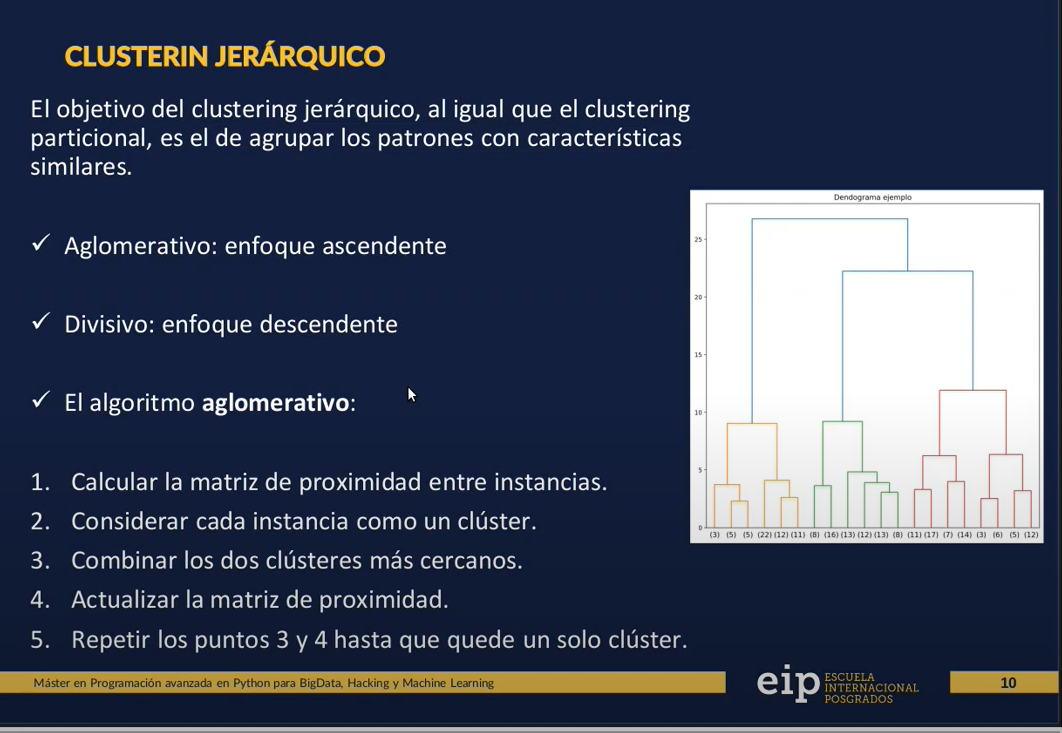

In [24]:
from IPython.display import Image
Image(filename='img/8.PNG')

In [25]:
import matplotlib.pyplot as plt 
from pandas import read_csv 

#--------------------------------------------------
from sklearn.cluster import AgglomerativeClustering 
#--------------------------------------------------

from sklearn.preprocessing import StandardScaler 

**linkage** es un hiper parametro que determina como se mide la distancia entre dos grupos

Como todo se puede customizar pero es necesario conocer como

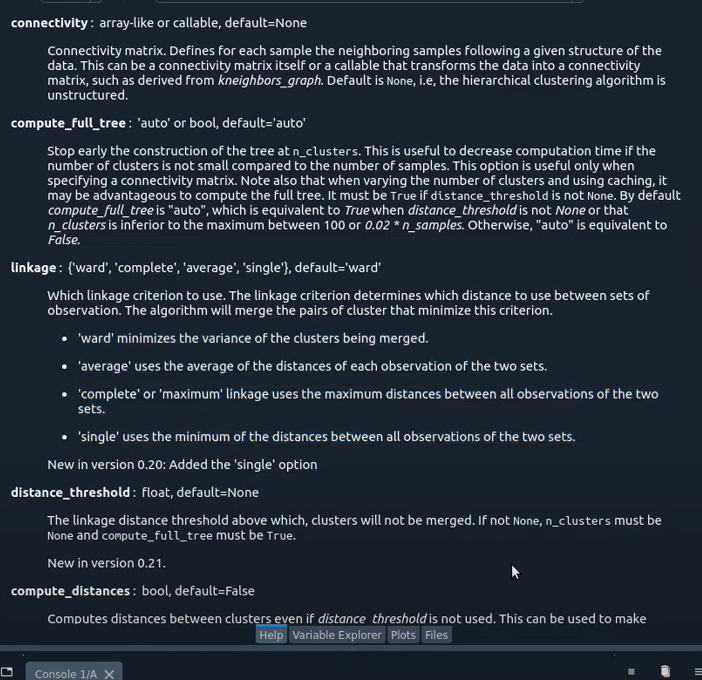

In [26]:
from IPython.display import Image
Image(filename='img/9.PNG')

**affinity** permite cambiar la métrica de distancia

Si en el metdo aglomerativo **SI** permite modificar la metrica de distancia entre clases.

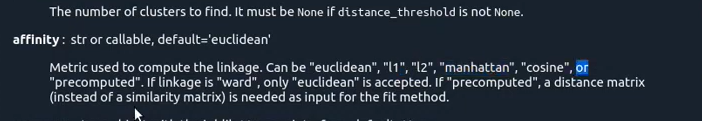

In [29]:
from IPython.display import Image
Image(filename='img/10.PNG')

In [27]:
filename = 'Seed_Data.csv'  

data = read_csv(filename)  
data.dropna(inplace=True) 

data.head()


,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [32]:
X=data 

scaler =StandardScaler() 

X_train = scaler.fit_transform(X)  

In [33]:
cluster = AgglomerativeClustering(n_clusters=5, linkage='ward') 

cluster.fit_predict(X) 

print(cluster.labels_)  

[4 4 3 3 4 3 2 3 4 4 2 3 2 3 3 2 2 4 4 3 3 3 4 3 4 4 3 3 3 3 3 4 2 3 4 4 4
 4 4 2 3 3 3 2 4 3 4 4 4 4 2 2 2 3 4 4 3 4 4 3 3 3 3 3 3 3 4 3 4 3 2 2 2 1
 2 2 2 1 1 4 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 2 1 4 1 1 1 1 2 1 1 2 2 2 4 2 4 4 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Ahora veremos como implementar un Endograma

Esto no vience de sklearn, se encuentra dentro de la clase scipy

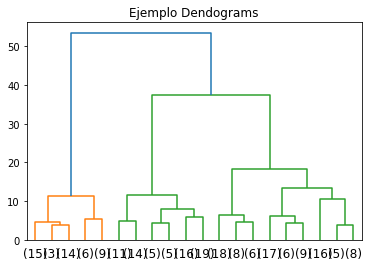

In [35]:

import scipy.cluster.hierarchy as dnd 
plt.figure() 
plt.title("Ejemplo Dendograms") 

#p---> limita el mnumero de grupo que deseo que se vea en pantalla
dend = dnd.dendrogram(dnd.linkage(X, method='ward'), truncate_mode='lastp', p=20) 